            x           y  z
0   58.080365  225.699042  a
1  238.867357  247.456645  a
2  156.218212  286.588782  a
3  262.004361  284.251445  a
4  185.243183  308.187571  a


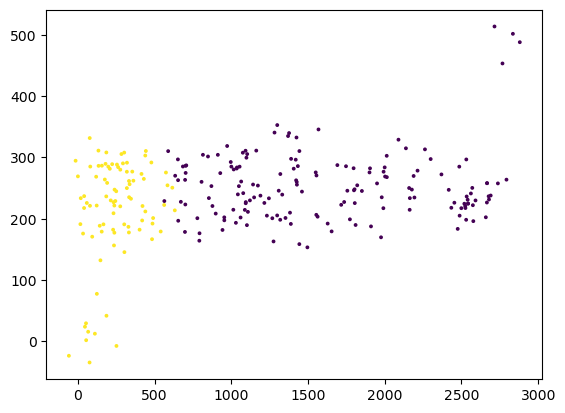

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 

# import data from freeCodeCamp github 
df = pd.read_csv("https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv")
print(df.head())

X = df[['x', 'y']].values
y = df['z'] == "a" 

plt.scatter(X[:, 0], X[:, 1], c=y, s=3) 

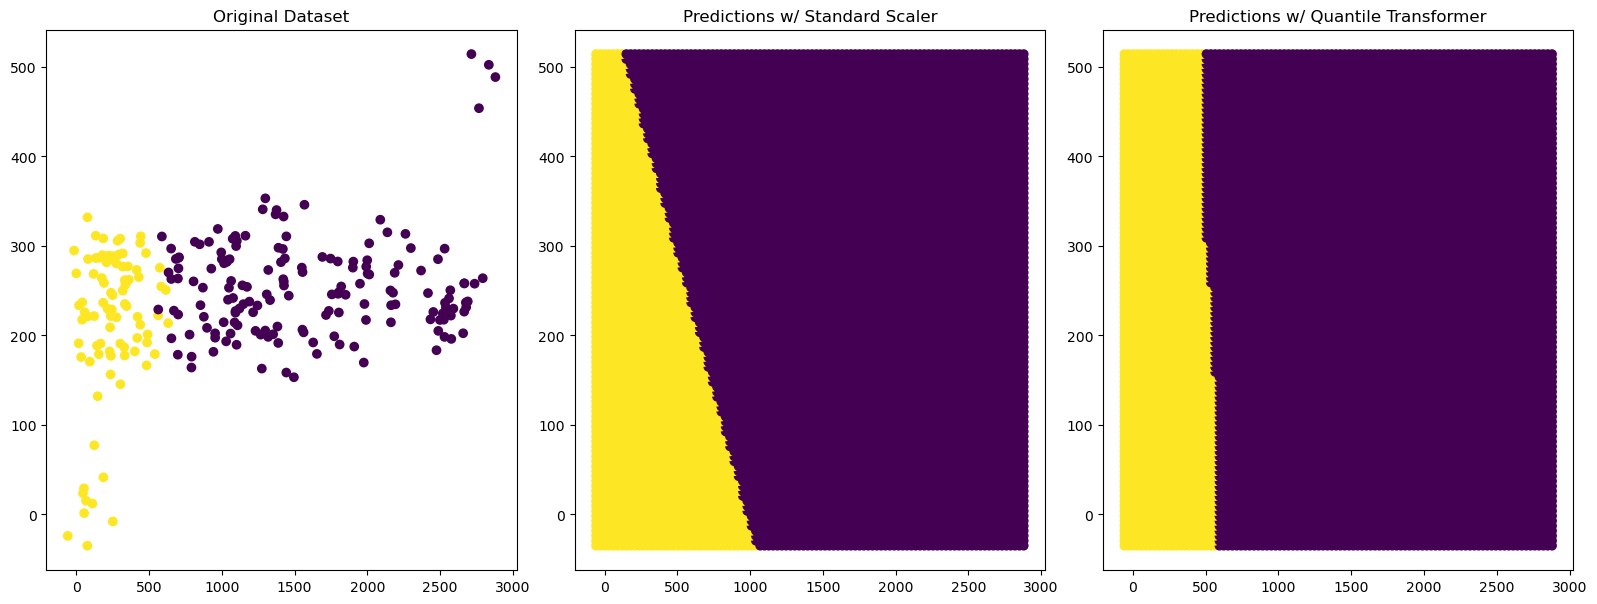

In [3]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import QuantileTransformer, StandardScaler

pipe1 = Pipeline([ 
    ("scale", StandardScaler()), 
    ("model", Perceptron())
])

pipe2 = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)), 
    ("model", Perceptron())
])

# Get meshgrid and find coordinates 
x_vals = np.linspace(min(X[: , 0]), max(X[:, 0]), 100)
y_vals = np.linspace(min(X[: , 1]), max(X[:, 1]), 100)
xx, yy = np.meshgrid(x_vals, y_vals)
coords = np.stack((xx.ravel(), yy.ravel()), axis=1)

fig, axes = plt.subplots(figsize=(16, 6), nrows=1, ncols=3) 
plt.tight_layout() 

axes[0].set_title("Original Dataset")
axes[1].set_title("Predictions w/ Standard Scaler")
axes[2].set_title("Predictions w/ Quantile Transformer")
axes[0].scatter(X[:, 0], X[: , 1], c=y)
axes[1].scatter(xx, yy, c=pipe1.fit(X, y).predict(coords))
axes[2].scatter(xx, yy, c=pipe2.fit(X, y).predict(coords))

plt.savefig("Perceptron.png")